<a href="https://colab.research.google.com/github/cowsilver57/Project/blob/main/%EC%B9%B4%EB%93%9C%EC%82%AC1_%EA%B0%9C%EC%9A%94_%EB%B0%8F_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/BankChurners.csv')

# 1. 프로젝트 개요

## 1-1. 추진 배경
* 은행의 한 관리자는 신용 카드 서비스의 고객 이탈율이 더 높아지는 것에 대해 걱정하고 있음.
* 고객 10,000명 중 1,627명이 이탈하여 16.07%의 높은 이탈율을 보이고 있음.

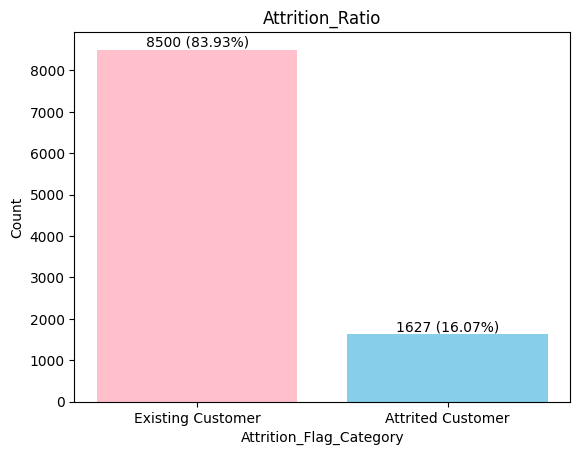

In [6]:
# 고객 이탈율 확인
data['Attrition_Flag'].unique()

# 열의 고유한 값들을 확인
unique_values = data['Attrition_Flag'].unique()

# 각 고유 값의 빈도수를 계산
value_counts = data['Attrition_Flag'].value_counts()

# 빈도수를 막대 그래프로 시각화
plt.bar(value_counts.index, value_counts.values, color=['pink', 'skyblue'])
plt.xlabel('Attrition_Flag_Category')
plt.ylabel('Count')
plt.title('Attrition_Ratio')

# 그래프 위에 비율을 표시
total_count = len(data)
for i, count in enumerate(value_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{count} ({percentage:.2f}%)', ha='center', va='bottom')

plt.show()

## 1-2. 현상 파악
* 위의 이탈률이 회사의 손실로 이어질지? 즉, 회사에 16%의 이탈률이 얼마나 critical 한지?
* 이탈 고개과 미이탈 고객의 총 거래 금액과 평균 거래 금액을 살펴봄.

In [8]:
#총 거래 금액
total_trans_amt = data['Total_Trans_Amt'].sum()
print("총 거래 금액:", total_trans_amt)

print("--"*20)

#이탈 고객
attrited_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
#이탈 고객 수
attrited_customer_count = len(attrited_customers)
print("이탈 고객 수:", attrited_customer_count, '명')
#이탈 고객의 총 거래 금액
ac_total_trans_amt = attrited_customers['Total_Trans_Amt'].sum()
print("이탈 고객의 총 거래 금액:", ac_total_trans_amt)
#총 거래 금액에서 이탈 고객의 거래 금액이 차지하는 비율
attrited_customer_ratio = (ac_total_trans_amt / total_trans_amt) * 100
print("(이탈 고객 거래 금액/총 거래 금액) 비율:", attrited_customer_ratio, '%')
#이탈 고객의 평균 거래 금액
ac_avg_amt = ac_total_trans_amt / attrited_customer_count
print("이탈 고객의 평균 거래 금액:", ac_avg_amt)

print("--"*20)

#미이탈 고객
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']
#미이탈 고객 수
existing_customer_count = len(existing_customers)
print("미이탈 고객 수:", existing_customer_count, '명')
#미이탈 고객의 총 거래 금액
ec_total_trans_amt = existing_customers['Total_Trans_Amt'].sum()
print("미이탈 고객의 총 거래 금액:", ec_total_trans_amt)
#총 거래 금액에서 미이탈 고객의 거래 금액이 차지하는 비율
existing_customer_ratio = (ec_total_trans_amt/total_trans_amt) * 100
print("(미이탈 고객 거래 금액/총 거래 금액) 비율:", existing_customer_ratio, '%')
#미이탈 고객의 평균 거래 금액
ec_avg_amt = ec_total_trans_amt / existing_customer_count
print("미이탈 고객의 평균 거래 금액:", ec_avg_amt)

총 거래 금액: 44600182
----------------------------------------
이탈 고객 수: 1627 명
이탈 고객의 총 거래 금액: 5035607
(이탈 고객 거래 금액/총 거래 금액) 비율: 11.290552581153145 %
이탈 고객의 평균 거래 금액: 3095.025814382299
----------------------------------------
미이탈 고객 수: 8500 명
미이탈 고객의 총 거래 금액: 39564575
(미이탈 고객 거래 금액/총 거래 금액) 비율: 88.70944741884685 %
미이탈 고객의 평균 거래 금액: 4654.655882352941


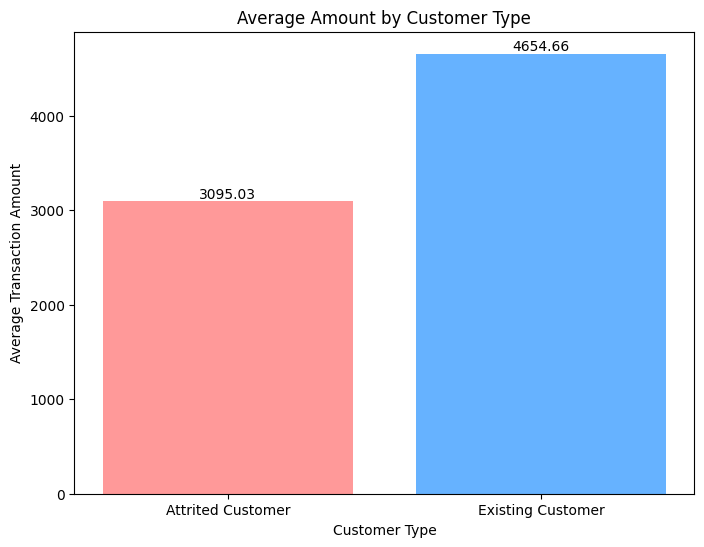

In [9]:
# 위의 결과 중 고객 유형(이탈/미이탈)별 평균 거래 금액 시각화

# 이탈 고객과 미이탈 고객의 평균 거래 금액 데이터
avg_amt_data = {'Attrition_Flag': ['Attrited Customer', 'Existing Customer'],
                'Avg_Trans_Amt': [ac_avg_amt, ec_avg_amt]}

# 데이터프레임 생성
avg_amt_df = pd.DataFrame(avg_amt_data)

# 바차트 색상 정의
colors = ['#FF9999', '#66B2FF']

# 바차트 생성
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_amt_df['Attrition_Flag'], avg_amt_df['Avg_Trans_Amt'], color=colors)

# 각 바에 거래 금액 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Customer Type')
plt.ylabel('Average Transaction Amount')
plt.title('Average Amount by Customer Type')
plt.show()

### **결과**
* 이탈 고객의 비율은 낮지만 체납자와 완납자의 평균 개별 소비액은 크게 차이나지 않음.
* 이 결과를 통해 이탈 고객의 증가는 회사의 전체적인 손실을 초래할 위험성이 있다고 판단함.

# 2. 분석

## 2-1. 성별 별 이탈 여부 비교

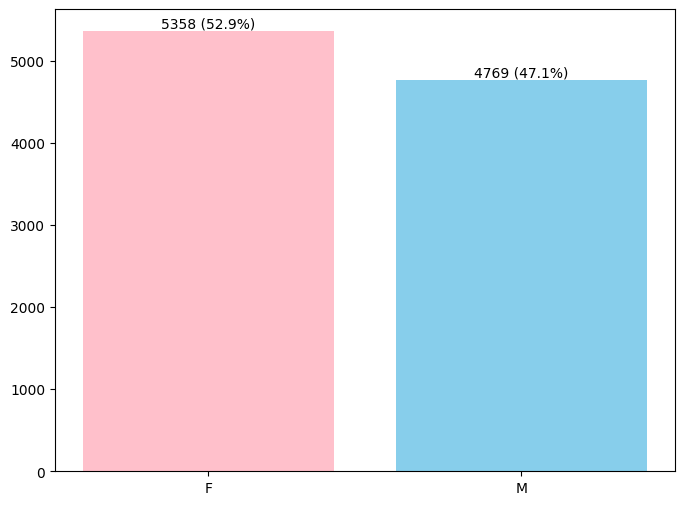

In [10]:
# Gender의 빈도 수 확인
value_counts = data['Gender'].value_counts()
total = value_counts.sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts, color=['pink', 'skyblue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval} ({yval/total*100:.1f}%)', va='bottom', ha='center')

plt.show()

In [11]:
# 성별에 따른 이탈 여부 비교
churn_by_gender2 = data.groupby(['Gender', 'Attrition_Flag']).size().unstack()
churn_by_gender2

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


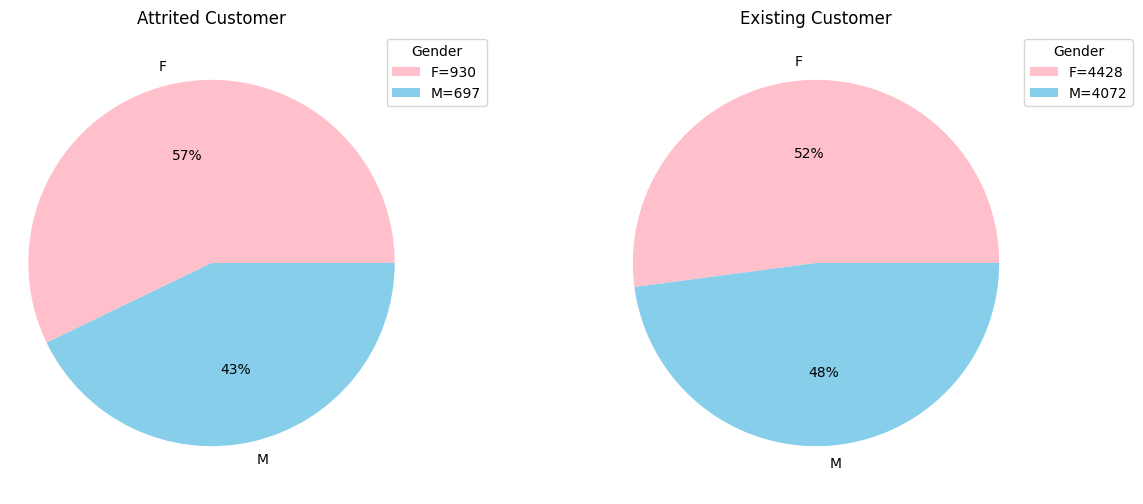

In [12]:
# 파이차트로 시각화
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
colors = ['pink', 'skyblue']

pie1 = axes[0].pie(churn_by_gender2['Attrited Customer'],
            labels=churn_by_gender2.index, autopct='%1.0f%%', colors=colors)
axes[0].axis('equal')  # 원형을 유지하도록 설정
axes[0].set_title('Attrited Customer')
axes[0].legend(pie1[0], [f'F={churn_by_gender2["Attrited Customer"]["F"]}', f'M={churn_by_gender2["Attrited Customer"]["M"]}'],
               title='Gender', loc="best", bbox_to_anchor=(1.2, 1))


pie2 = axes[1].pie(churn_by_gender2['Existing Customer'],
            labels=churn_by_gender2.index, autopct='%1.0f%%', colors=colors)
axes[1].axis('equal')  # 원형을 유지하도록 설정
axes[1].set_title('Existing Customer')
axes[1].legend(pie2[0], [f'F={churn_by_gender2["Existing Customer"]["F"]}', f'M={churn_by_gender2["Existing Customer"]["M"]}'],
               title='Gender', loc="best", bbox_to_anchor=(1, 1))

plt.subplots_adjust(wspace=0.5)

plt.show()

### 결과
* 총 이탈 고객 1,627명 중 여성 930명으로 57%, 남성 697명으로 43% 차지
* **여성의 이탈률이 더 높음**

## 2-2. 왜 여성이 더 이탈률이 높을까?
* 프로젝트 진행 시 활용했던 상관관계 히트맵 참고
* Gender와 상관계수가 높은 Income_Category(-0.76), Credit_Limit(-0.42)와 이탈 여부 사이의 상관관계를 살펴봄

### Gender & Income_Category & Attrition_Flag

남녀 소득 구간 별 빈도수 구하기

In [16]:
# ㄱ. 남녀 소득 구간 별 빈도수
income_category_by_gender = data.groupby(['Income_Category', 'Gender']).size().unstack()
income_category_by_gender = income_category_by_gender.fillna(0)

income_category_by_gender

Gender,F,M
Income_Category,,
$120K +,0.0,727.0
$40K - $60K,1014.0,776.0
$60K - $80K,0.0,1402.0
$80K - $120K,0.0,1535.0
Less than $40K,3284.0,277.0
Unknown,1060.0,52.0


시각화

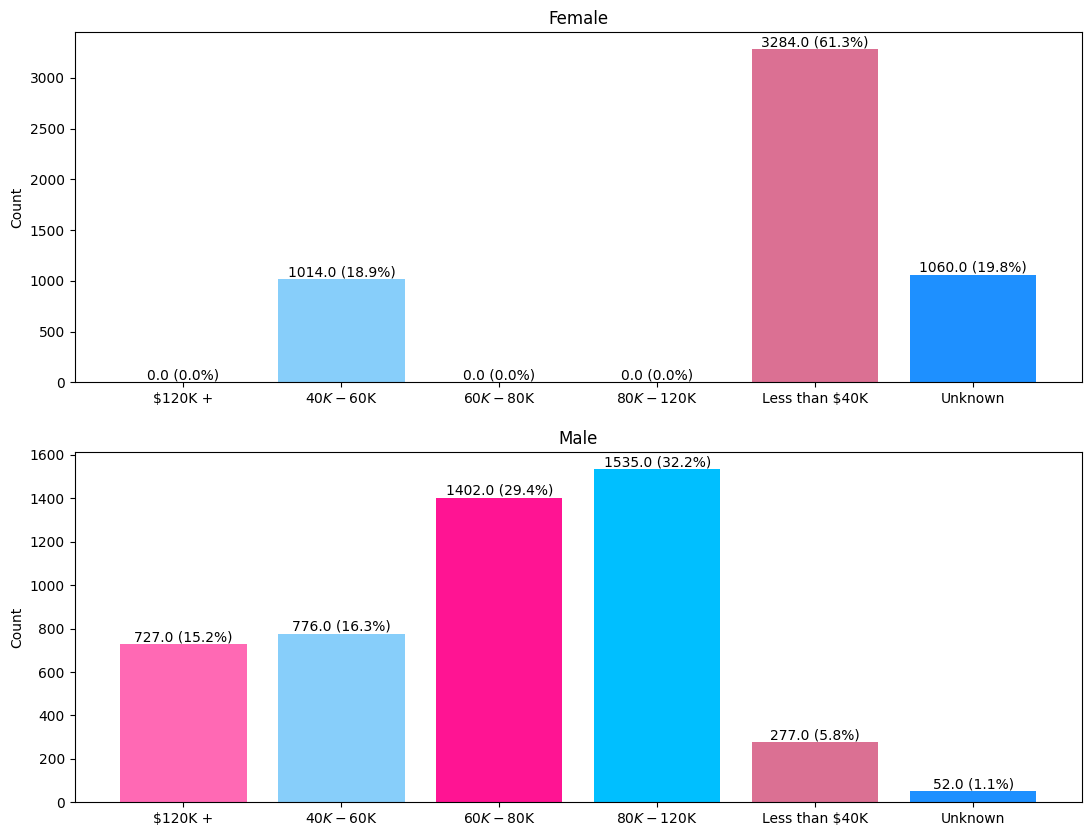

In [17]:
# ㄴ. 시각화
fig, axes = plt.subplots(2, 1, figsize=(13, 10))
colors = ['#FF69B4','#87CEFA','#FF1493','#00BFFF','#DB7093','#1E90FF']

# 첫 번째 서브플롯
bars1 = axes[0].bar(income_category_by_gender.index, income_category_by_gender['F'], color=colors)
axes[0].set_title('Female')
axes[0].set_ylabel('Count')
for bar in bars1:
    yval = bar.get_height()
    percentage = yval / income_category_by_gender['F'].sum() * 100
    axes[0].annotate(f'{yval} ({percentage:.1f}%)',
                   (bar.get_x() + bar.get_width() / 2., yval),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

# 두 번째 서브플롯
bars2 = axes[1].bar(income_category_by_gender.index, income_category_by_gender['M'], color=colors)
axes[1].set_title('Male')
axes[1].set_ylabel('Count')
for bar in bars2:
    yval = bar.get_height()
    percentage = yval / income_category_by_gender['M'].sum() * 100
    axes[1].annotate(f'{yval} ({percentage:.1f}%)',
                   (bar.get_x() + bar.get_width() / 2., yval),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

plt.subplots_adjust(wspace=0.5)
plt.show()

세 변수의 간의 상관관계 파악

In [19]:
cross_tab = pd.crosstab(index=[data['Income_Category'], data['Gender']], columns=data['Attrition_Flag'])
cross_tab

Attrition_Flag          Attrited Customer  Existing Customer
Income_Category Gender                                      
$120K +         M                     126                601
$40K - $60K     F                     166                848
                M                     105                671
$60K - $80K     M                     189               1213
$80K - $120K    M                     242               1293
Less than $40K  F                     582               2702
                M                      30                247
Unknown         F                     182                878
                M                       5                 47

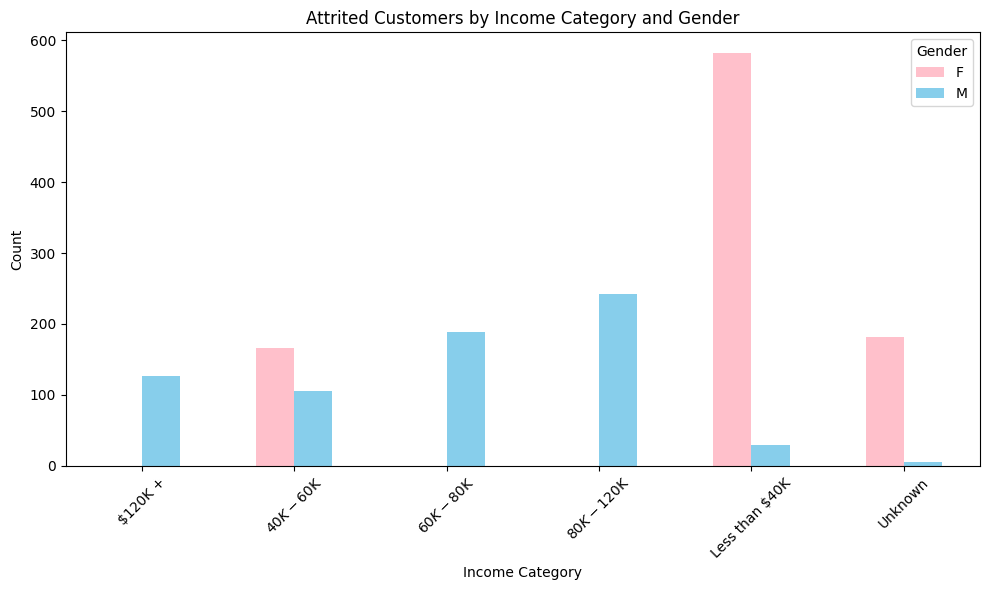

In [21]:
import numpy as np

# 'Attrition_Flag'가 'Attrited Customer'인 데이터만 필터링
attrited_customers = cross_tab['Attrited Customer']

# 데이터 재구성
rearranged_data = pd.DataFrame(attrited_customers.unstack(level=1))

# 바 차트 시각화
rearranged_data.plot(kind='bar', figsize=(10, 6), color=['pink', 'skyblue'])
plt.title('Attrited Customers by Income Category and Gender')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

카이제곱 검정 수행

In [23]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("p-value가 유의 수준보다 작으므로, 세 변수 간에는 통계적으로 유의미한 상관 관계가 있습니다.")
else:
    print("p-value가 유의 수준보다 크므로, 세 변수 간에는 통계적으로 유의미한 상관 관계가 없습니다.")

Chi-square statistic: 26.55725017035084
p-value: 0.0008427760247474989
p-value가 유의 수준보다 작으므로, 세 변수 간에는 통계적으로 유의미한 상관 관계가 있습니다.


### 결과
* 상대적으로 소득이 적은 여성의 이탈률이 높은 것으로 나타남.
* 이탈률을 줄이기 위해 이탈할 가능성이 가장 큰 집단인 '소득이 적은 여성'을 위한 비즈니스 전략 도출 필요